In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/stable-diffusion-image-to-prompts'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session





/kaggle/input/stable-diffusion-image-to-prompts/sample_submission.csv
/kaggle/input/stable-diffusion-image-to-prompts/prompts.csv
/kaggle/input/stable-diffusion-image-to-prompts/images/f27825b2c.png
/kaggle/input/stable-diffusion-image-to-prompts/images/92e911621.png
/kaggle/input/stable-diffusion-image-to-prompts/images/a4e1c55a9.png
/kaggle/input/stable-diffusion-image-to-prompts/images/20057f34d.png
/kaggle/input/stable-diffusion-image-to-prompts/images/d8edf2e40.png
/kaggle/input/stable-diffusion-image-to-prompts/images/227ef0887.png
/kaggle/input/stable-diffusion-image-to-prompts/images/c98f79f71.png


In [2]:
# some problem extracting 900k dataset
# for dirname, _, filenames in os.walk('/kaggle/input/900k-diffusion-prompts-dataset/features'):
#     for filename in filenames[:10]:
#         print(os.path.join(dirname, filename))

# PLAN

DATA
load with minimal formatting:
images as numpy (X) <- function
text for fun
embeddings -> vector for each image (y)
{x:(y)}
Dict = {ImgID: (eID1, ... eID373)}
Data: load one (or batch) image at a time by ImgID, 

CODE
look again on tensorflow assignments for reference
some model CNN

EMBEDDING
test the embedding code:
copy/load their embedding model
take given text, run through their model 
and check whether its the same embadding as given embedding

ADD MORE DATASET FROM STABLE DIFFUSSION

BASIC FUNCTIONS:
* load one image from path to numpy arrays
* convert text to embedding (using their "Calculating Stable Diffusion Prompt Embeddings" model)
* evaluate 2 embeddings (using their "Calculating Stable Diffusion Prompt Embeddings" model)
* create dictionary: Dict = {ImgID: (eID1, ... eID373)}


NOT A FUNCTION:
* run our convert_text_to_embedding on given texts
* run our evaluation on our embedding vs given embedding

# DATA

In [3]:
sample_image = "/kaggle/input/stable-diffusion-image-to-prompts/images/f27825b2c.png"

from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import requests
from io import BytesIO

def img_path_to_numpy(img_path):
    img = Image.open(img_path)
    numpydata = asarray(img)
    return numpydata

def print_img_from_path(img_path):
    image = mpimg.imread(img_path)
    plt.imshow(image)
    plt.show()

def print_img_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.show()

def img_url_to_numpy(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    numpydata = asarray(img)
    return numpydata

    


In [4]:
import csv

sample_submission_path = "/kaggle/input/stable-diffusion-image-to-prompts/sample_submission.csv"

def parse_submission_file(submission_path):
    pic_IDs = []
    vector_of_vecs = []
    with open(submission_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        vec = []
        for row in reader:  
            pic_name = row[0]
            vec_element = float(row[1])
            pic_ID = pic_name[:pic_name.find("_")]
            eID = pic_name[pic_name.find("_")+1:]
            vec.append(vec_element)
            if (eID == "383"):
                vector_of_vecs.append(vec)
                vec = []
                pic_IDs.append(pic_ID)
    return (pic_IDs, vector_of_vecs)

(pic_IDs, vector_of_vecs) = parse_submission_file(sample_submission_path)

# print (pic_IDs[0])
# print(len(vector_of_vecs[0]))
# print(vector_of_vecs[0])

In [5]:
dict_X_y = {pic_IDs[i]: vector_of_vecs[i] for i in range(len(pic_IDs))}

# print (dict_X_y)
# print (dict_X_y[pic_IDs[0]])

https://krea-prod-v1-generations.s3.us-east-1.amazonaws.com/images/00000d0e-45cb-47b6-9f72-6a481e940d78.png
0 0
1 00000d0e-45cb-47b6-9f72-6a481e940d78
2 man waking up, dark and still room, cinematic light, backlight, red sky blue, misty, by mikhail vrubel, by philippe druillet, by peter elson, by gerald brom, muted colors, ( ( extreme detail ) ), trending on artstation, 8 k w 7 6 8
3 https://krea-prod-v1-generations.s3.us-east-1.amazonaws.com/images/00000d0e-45cb-47b6-9f72-6a481e940d78.png
4 512
5 512
6 stablediffusionweb.com


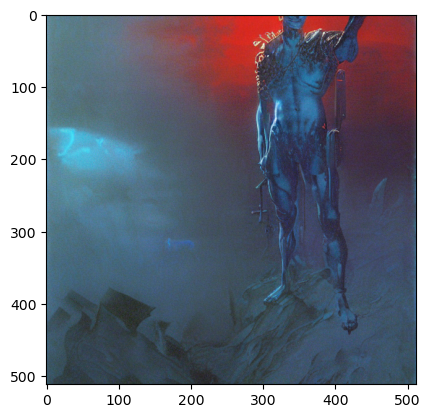

In [6]:
additional_900k_dataset_csv_path = "/kaggle/input/900k-diffusion-prompts-dataset/diffusion_prompts.csv"
with open(additional_900k_dataset_csv_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    next(spamreader)
    for row in spamreader: 
        print (row[3])
        for i in range(7):
            print (i, row[i])
        break




url = row[3]
print_img_from_url(url)

In [7]:
for i in range(7):
    print (row[i])
row[3]

0
00000d0e-45cb-47b6-9f72-6a481e940d78
man waking up, dark and still room, cinematic light, backlight, red sky blue, misty, by mikhail vrubel, by philippe druillet, by peter elson, by gerald brom, muted colors, ( ( extreme detail ) ), trending on artstation, 8 k w 7 6 8
https://krea-prod-v1-generations.s3.us-east-1.amazonaws.com/images/00000d0e-45cb-47b6-9f72-6a481e940d78.png
512
512
stablediffusionweb.com


'https://krea-prod-v1-generations.s3.us-east-1.amazonaws.com/images/00000d0e-45cb-47b6-9f72-6a481e940d78.png'

# EMBEDDINGS

In [8]:
import sys
import numpy as np
import pandas as pd
from pathlib import Path

sys.path.append('../input/sentence-transformers-222/sentence-transformers')
from sentence_transformers import SentenceTransformer, models

comp_path = Path('/kaggle/input/stable-diffusion-image-to-prompts/')

In [9]:
prompts = pd.read_csv(comp_path / 'prompts.csv', index_col='imgId')
prompts.head(7)

,prompt
imgId,
20057f34d,hyper realistic photo of very friendly and dys...
227ef0887,"ramen carved out of fractal rose ebony, in the..."
92e911621,ultrasaurus holding a black bean taco in the w...
a4e1c55a9,a thundering retro robot crane inks on parchme...
c98f79f71,"portrait painting of a shimmering greek hero, ..."
d8edf2e40,an astronaut standing on a engaging white rose...
f27825b2c,Kaggle employee Phil at a donut shop ordering ...


In [10]:
sample_submission = pd.read_csv(comp_path / 'sample_submission.csv', index_col='imgId_eId')
sample_submission.head()

,val
imgId_eId,
20057f34d_0,0.018848
20057f34d_1,0.030190
20057f34d_2,0.072792
20057f34d_3,-0.000673
20057f34d_4,0.016774


In [11]:
st_model = SentenceTransformer('/kaggle/input/sentence-transformers-222/all-MiniLM-L6-v2')

In [12]:
prompt_embeddings = st_model.encode(prompts['prompt']).flatten()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
prompt_embeddings

array([0.01884852, 0.03018975, 0.07279222, ..., 0.03056296, 0.01404709,
       0.02376371], dtype=float32)

In [14]:
sample_submission['val'].values

array([0.01884845, 0.03018973, 0.0727922 , ..., 0.03056296, 0.01404711,
       0.02376364])

In [15]:
assert np.all(np.isclose(sample_submission['val'].values, prompt_embeddings, atol=1e-07))

AssertionError: 

In [ ]:
def convert_text_to_embedding(text):
    st_model = SentenceTransformer('/kaggle/input/sentence-transformers-222/all-MiniLM-L6-v2')
    return st_model.encode(text).flatten()



# Marina's bluh

In [ ]:
def compare_all():
    np.all(np.isclose(sample_submission['val'].values, prompt_embeddings, atol=1e-07))

In [ ]:
prompt_embeddings

In [ ]:
for i in range(len(prompt_embeddings)):
    break
    print (np.all(np.isclose(sample_submission['val'].values[i], prompt_embeddings[i], atol=1e-07)))

In [ ]:
import numpy as np
from numpy.linalg import norm
 
# define two lists or array
A = np.array([2,1,2,3,2,9])
B = np.array([3,4,2,4,5,5])
 
print("A:", A)
print("B:", B)
 
# compute cosine similarity
cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)


def cosine_similarity(A, B):
    cosine = np.dot(A,B)/(norm(A)*norm(B))
    return cosine

def cosine_results(sample_submission, prompt_embeddings):
    return cosine_similarity(sample_submission['val'].values, prompt_embeddings)
    #atol=1e-07

cosine_results(sample_submission, prompt_embeddings)

# copy of coursera cnn code

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])